# 이미지 프로세싱 기초
### 1. 관심 영역

In [16]:
# 이미지 불러오기
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./picture/bird.jpg')

# 관심 영역의 좌표 지정
x = 1000; y = 200; w = 550; h = 550

# cv2는 세로, 가로 순서로 길이를 지정한다.. → 행, 렬 순으로 슬라이싱하기 때문에
roi = img[y:y+h, x:x+w]

print(roi.shape)

# 지정한 관심 영역에 사각형 그리기
cv2.rectangle(roi, (0, 0), (h-1, w-1), (0, 0, 0), 5) # roi 이미지에서 roi의 시작점 ~ h, w 만큼(끝점-1) 사각형 그리기
cv2.imshow('Img', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(550, 550, 3)


In [27]:
### 관심영역 복제 및 새 창 띄우기
import cv2
import numpy as np

img = cv2.imread('./picture/bird.jpg')

# 원본 이미지에서 관심 영역을 지정하기
x = 1000; y = 200; w = 550; h = 550
roi = img[y:y+h, x:x+w]

# 관심 영역만 copy하기
img2 = roi.copy()
# 원본 이미지의 왼쪽에 roi를 넣기
img[y:y+h, x-w:x] = roi
# roi가 들어가 있는 원본 이미지에 사각형 그리기.
cv2.rectangle(img, (x-w, y), (x+w, y+h), (0,0,0))

# 원본이미지 + roi이미지
cv2.imshow('img', img)
# roi 이미지 부분만
cv2.imshow('roi', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
### 마우스로 관심 영역 지정하기
import numpy as np
import cv2

isDragging = False
x0, y0, w, h = -1, -1, -1, -1 #시작점 = 무효값
blue = (255, 0, 0)
red = (0, 0, 255)

def onMouse(event, x, y, flags, param):
    global isDragging, x0, y0, img

    # 만약 마우스 우클릭 상태이면 → 드래그 상태 True, 시작 좌표를 각각 x0, y0에 저장
    if event == cv2.EVENT_LBUTTONDOWN:
        isDragging = True
        x0 = x
        y0 = y

    # 만약 마우스 이동상태 + isDragging True 상태이면
    elif event == cv2.EVENT_MOUSEMOVE:
        if isDragging:
            # 원본 이미지 copy
            img_draw = img.copy()
            # 원본 이미지에 클릭 시작점 ~ 이동하는 x,y 만큼의 사각형 그리기
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2)
            # 사각형이 그려진 img 보여주기
            cv2.imshow('img', img_draw)

    # 마우스 우클릭 해제 상태이면
    elif event == cv2.EVENT_LBUTTONUP:
        # isDragging을 False로 바꿔준다 → 마우스 이동을 더이상 읽을 필요 없게!
        if isDragging:
            isDragging = False
            # 시작점 x0, y0을 마지막 이동 위치인 x, y에서 빼서 총 움직인 거리 h, w를 구한다.
            w = x - x0
            h = y - y0
            print(x0, y0, w, h)
            
            # 두 이동거리가 양수인 경우 = 좌상단에서 우하향으로 이동한 경우
            if w > 0 and h > 0:
                # 원본 이미지 copy
                img_draw = img.copy()
                # 원본 이미지에 최종 영역으로 만들어진 빨간 사각형 그리기
                cv2.rectangle(img_draw, (x0, y0), (x, y), red, 2)
                # 사각형 좌표만큼으로 관심 영역으로 지정
                roi = img[y0:y0+h, x0:x0+w]
                # 잘려나온 이미지 roi 보여주기
                cv2.imshow('cropped', roi)
                # 이때  보여줄 창을 왼쪽 상단에 고정
                cv2.moveWindow('cropped', 0, 0)
                # 그리고 그 이미지를 저장하기
                cv2.imwrite('./picture/cropped.jpg', roi)
                print('Cropped.')
            
            # 만약 이동거리가 음수이면 안내 문구 출력
            else:
                cv2.imshow('img', img)
                print('좌측 상단에서 우측 하단으로 드래그하세요')


img = cv2.imread('./picture/love1.jpg')
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse)
cv2.waitKey()
cv2.destroyAllWindows()

626 321 342 246
Cropped.


In [36]:
### selectROI → 관심 영역 지정을 위한 cv2의 함수
import cv2
import numpy as np

img = cv2.imread('./picture/letters.jpg')

x, y, w, h = cv2.selectROI('img', img, False)

if w and h:
    roi = img[y:y+h, x:x+w]
    cv2.imshow('cropped', roi)
    cv2.moveWindow('cropped', 0, 0)
    cv2.imwrite('./picture/cropped.jpg', roi)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


### 2. 컬러 스페이스

In [42]:
### BGR, BGRA, Alpha
import numpy as np
import cv2

img = cv2.imread('./picture/opencv_logo.png')
bgr = cv2.imread('./picture/opencv_logo.png', cv2.IMREAD_COLOR)
bgra = cv2.imread('./picture/opencv_logo.png', cv2.IMREAD_UNCHANGED) # 4차원 체널을 살려서 불러오기

res1 = cv2.resize(img, dsize=(750, 500), interpolation=cv2.INTER_CUBIC)
res2 = cv2.resize(bgr, dsize=(750, 500), interpolation=cv2.INTER_CUBIC)
res3 = cv2.resize(bgra, dsize=(750, 500), interpolation=cv2.INTER_CUBIC)

print('img shape: ', res1.shape)
print('bgr shape: ', res2.shape)
print('bgra shape: ', res3.shape) #(500, 750, 4)

cv2.imshow('bgr', res1)
cv2.imshow('bgra', res2)
 # 그렇다면 마지막 체널은 뭘까? = 배경은 검정(0), 그림은 흰색(255)를 갖는다.
cv2.imshow('alpha', res3[:, :, 3])

cv2.waitKey(0)
cv2.destroyAllWindows()

img shape:  (500, 750, 3)
bgr shape:  (500, 750, 3)
bgra shape:  (500, 750, 4)


In [46]:
### 컬러 스페이스 → 그레이 스케일
import cv2
import numpy as np

img = cv2.imread('./picture/woman.jpg')
img = cv2.resize(img, dsize=(1000, 1000), interpolation=cv2.INTER_CUBIC)

img2 = img.astype(np.uint16) # 합치면 255보다 큰 값이 나올 수 있으니까 잠깐 바꿔준다.
b, g, r = cv2.split(img2)
# 권장 : b, g, r = img2[:,:,0], img2[:,:,1], img2[:,:,2] (split은 copy를 사용하기 때문에 자원을 많이 쓴다...)
gray1 = ((b+g+r)/3).astype(np.uint8) # 계산후의 값에 다시 uint8로 변환해준다.
gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('original', img)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
### BGR에서 HSV로 변환 (색상만 볼 수 있다)
import cv2
import numpy as np

red_bgr = np.array([[[0, 0, 255]]], dtype=np.uint8)
green_bgr = np.array([[[0, 255, 0]]], dtype=np.uint8)
blue_bgr = np.array([[[255, 0, 0]]], dtype=np.uint8)
yellow_bgr = np.array([[[0, 255, 255]]], dtype=np.uint8)

red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV)
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV)
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV)
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV)

# BGR 기본 색상은 가장 선명하고 밝은색이므로 hsv에서 순도와 밝기 정보는 각각 255, 255로 출력
# hsv의 h는 기본적으로 컬러 정보를 말한다.
print('red : ', red_hsv)
print('green : ', green_hsv)
print('blue : ', blue_hsv)
print('yellow : ', yellow_hsv)

red :  [[[  0 255 255]]]
green :  [[[ 60 255 255]]]
blue :  [[[120 255 255]]]
yellow :  [[[ 30 255 255]]]


In [49]:
### BGR에서 YUV로 변환 (밝기만 볼 수 있다)
import cv2
import numpy as np

dark = np.array([[[0, 0, 0]]], dtype=np.uint8)
middle = np.array([[[127, 127, 127]]], dtype=np.uint8)
bright = np.array([[[255, 255, 255]]], dtype=np.uint8)

dark_yuv = cv2.cvtColor(dark, cv2.COLOR_BGR2YUV)
middle_yuv = cv2.cvtColor(middle, cv2.COLOR_BGR2YUV)
bright_yuv = cv2.cvtColor(bright, cv2.COLOR_BGR2YUV)

# YUV는 밝기와 R, B의 차를 이용한 값으로 표현
# 밝기, 밝기 - R, 밝기 - B 
print('dark : ', dark_yuv)
print('middle : ', middle_yuv)
print('bright : ', bright_yuv)

dark :  [[[  0 128 128]]]
middle :  [[[127 128 128]]]
bright :  [[[255 128 128]]]


### 3. 스레시홀딩

127.0


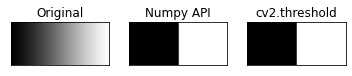

In [51]:
### 전역 스레시홀딩
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./picture/gray_scale.png')

# 원본 이미지와 같은 크기의 0 (검정) 이미지 만들기
thresh_np = np.zeros_like(img)
# 만약 원본의 값이 127을 넘으면 255(흰색)을 검정 이미지에 넣기
thresh_np[img > 127] = 255

# threshold : 이미지에서 threshold를 넘는 값에 특정 값을 넣어 줄  수 있다.
# 경계값과 이미지 반환...
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(ret)

imgs = {'Original':img, 'Numpy API':thresh_np, 'cv2.threshold':thresh_cv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

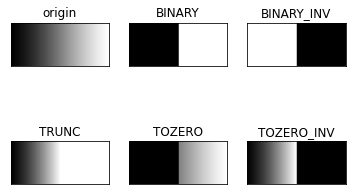

In [54]:
### 다양한 threshold flag
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./picture/gray_scale.png', cv2.IMREAD_GRAYSCALE)

# binary : 특정 임계점을 넘은 값에 지정한 값(255)을 대입, 아닌 값에 0(흑백) 대입
_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# binary_inv : binary의 반대 결과
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
# trunc : threshold를 넘으면 지정값(255)를 아니면 원래의 값을 유지
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
# tozero : 픽셀이 경계값을 넘으면 원래의 값, 아니면 0을 반환
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
# tozero_inv : tozero와 반대, 넘지 못하면 원래의 값, 아니면 0을 반환
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'origin':img, 'BINARY':t_bin, 'BINARY_INV':t_bininv, 'TRUNC':t_truc, 'TOZERO':t_2zr, 'TOZERO_INV':t_2zrinv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

otsu threshold: 131.0


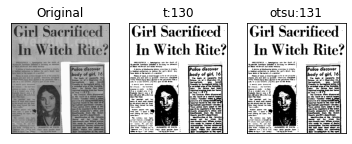

In [55]:
### 오츠의 알고리즘 : 적당한 임계값을 자동으로 계산해준다.
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./picture/scanned_paper.jpg', cv2.IMREAD_GRAYSCALE)

# 경계값을 130으로 지정하여 계산
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)
# 오츠의 알고리즘으로 binary 연산에서 img에서 가장 적당한 경계값의 출력 
t, t_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('otsu threshold:', t)


imgs = {'Original':img, 't:130':t_130, 'otsu:%d'%t: t_otsu}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

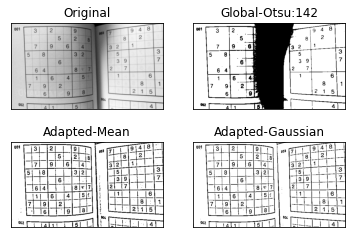

In [59]:
### 적응형 스레시홀드
import numpy as np
import cv2
import matplotlib.pyplot as plt

blk_size = 9
C = 5
img = cv2.imread('./picture/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blk_size, C)

imgs = {'Original':img, 'Global-Otsu:%d'%ret:th1, 'Adapted-Mean':th2, 'Adapted-Gaussian':th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

### 4. 이미지 연산

In [62]:
import cv2
import numpy as np

a = np.uint8([[200, 50]])
b = np.uint8([[100, 100]])

# numpy 연산
add1 = a + b
sub1 = a - b
mult1 = a * b
div1 = a / b

# opencv 연산
add2 = cv2.add(a, b)
sub2 = cv2.subtract(a, b)
mult2 = cv2.multiply(a, b)
div2 = cv2.divide(a, b)

print(add1, add2)
print(sub1, sub2)
print(mult1, mult2)
print(div1, div2)

[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[ 32 136]] [[255 255]]
[[2.  0.5]] [[2 0]]


In [71]:
### mask와 누적 할당 연산
import cv2
import numpy as np

a = np.array([[1, 2]], dtype=np.uint8)
b = np.array([[10, 20]], dtype=np.uint8)

mask = np.array([[1, 0]], dtype=np.uint8)

# 1 + 10 = 11, 2 + 20 = 22 → [11, 22] * [1, 0] → [11, 0]
c1 = cv2.add(a, b, None, mask)

# 1 + 10 = 11, 2 + 20 = 22 → [11, 22] * [1, 0] = [11, 0] + b[10, 20](누적 할당으로 20만 연산)
c2 = cv2.add(a, b, b, mask)

# 1 + 10 = 11, 2 + 20 = 22 → [11, 22] * [1, 0] = [11, 0] + a[1, 2](누적 할당으로 2만 연산)
c3 = cv2.add(a, b, a, mask)

print(c1)
print(c2)
print(c3)

[[11  0]]
[[11 20]]
[[12  2]]


(452, 640, 3)
(426, 640, 3)


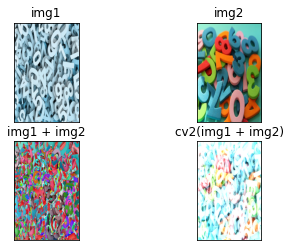

In [75]:
### 알파 블렌딩
import cv2
import numpy as np
import matplotlib.pylab as plt

img1 = cv2.imread('./picture/numbers1.jpg')
img2 = cv2.imread('./picture/numbers2.jpg')

print(img1.shape)
print(img2.shape)

res1 = cv2.resize(img1, dsize=(420, 640), interpolation=cv2.INTER_CUBIC)
res2 = cv2.resize(img2, dsize=(420, 640), interpolation=cv2.INTER_CUBIC)

#  계산 후 255가 넘는 값은 255로 나눈 나머지를 반환
img3 = res1 + res2
# 계산 후 255가 넘는 값은 255로 반환
img4 = cv2.add(res1, res2)

imgs = {'img1':res1, 'img2':res2, 'img1 + img2':img3, 'cv2(img1 + img2)':img4}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i + 1)
    plt.imshow(v[:, :, ::-1])
    plt.title(k)
    plt.xticks([])
    plt.yticks([])

plt.show()

In [22]:
### 알파 블렌딩
import cv2
import numpy as np

img1 = cv2.imread('./picture/numbers1.jpg')
img2 = cv2.imread('./picture/numbers2.jpg')

img1 = cv2.resize(img1, dsize=(420, 640), interpolation=cv2.INTER_CUBIC)
img2 = cv2.resize(img2, dsize=(420, 640), interpolation=cv2.INTER_CUBIC)

alpha = 0.5

blended = img1 * alpha + img2 * (1-alpha)
bleneded = blended.astype(np.uint8)
cv2.imshow('img1 * alpha + img2 * (1-alpha)', blended)

dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
cv2.imshow('cv2.addWeighted', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
### 트랙바로 알파 블랜딩
import cv2
import numpy as np

win_name = 'Alpha blending'
trackbar_name = 'fade'

def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0)
    cv2.imshow(win_name, dst)

img1 = cv2.imread('./picture/man_face.jpg')
img2 = cv2.imread('./picture/lion_face.jpg')

img1 = cv2.resize(img1, dsize=(300, 300), interpolation=cv2.INTER_CUBIC)
img2 = cv2.resize(img2, dsize=(300, 300), interpolation=cv2.INTER_CUBIC)

cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

[ WARN:0] global /tmp/pip-req-build-afu9cjzs/opencv/modules/highgui/src/window.cpp (703) createTrackbar UI/Trackbar(fade@Alpha blending): Using 'value' pointer is unsafe and deprecated. Use NULL as value pointer. To fetch trackbar value setup callback.


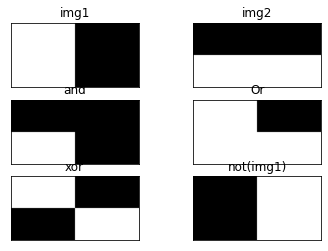

In [22]:
### 비트와이즈 연산
import numpy as np
import cv2
import matplotlib.pylab as plt

img1 = np.zeros((200, 400), dtype=np.uint8)
img2 = np.zeros((200, 400), dtype=np.uint8)
img1[:,:200] = 255
img2[100:200, :] = 255

# bitwise_and : 두 영역에서 하나라도 0이면 0 출력
bitAnd = cv2.bitwise_and(img1, img2)
# bitwise_or : 두 영역에서 하나라도 0이 아니면 값 출력
bitOr = cv2.bitwise_or(img1, img2)
# bitwise_xor : 두 영역에서 서로 다른 값을 가지면 연산값을 , 같은 값은 0으로
bitXor = cv2.bitwise_xor(img1, img2)
# bitwise_not : 기존 값의 반대 값 출력
bitNot = cv2.bitwise_not(img1)

imgs = {'img1':img1, 'img2':img2, 'and':bitAnd, 'Or':bitOr, 'xor':bitXor, 'not(img1)':bitNot}
for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(3, 2, i+1)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

In [19]:
import numpy as np
import cv2
import matplotlib.pylab as plt

img = cv2.imread('./picture/tent.jpg')

img = cv2.resize(img, dsize=(400, 600), interpolation=cv2.INTER_CUBIC)

# 전체 0(검정)이미지 생성
mask = np.zeros_like(img)
# mask 일부를 255(흰색)으로 변경
cv2.rectangle(mask, (0, 380), (200, 580), (255, 255, 255), -1)

# bitwise_and = 두 이미지 중 하나라도 0(검정)이 있으면 0(검정) 반환 → 하얗게 지정한 부위만 이미지가나오고 나머지 부분은 검게 나옴. 
masked_and = cv2.bitwise_and(img, mask)
# bitwise_or = 두 이미지 중 하나라도 255(하양)이 있으면 255(하양) 반환 → 하얗게 지정한 부분은 하얗게, 그 외는 이미지가 잘 나옴
masked_or = cv2.bitwise_or(img, mask)

cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked_and', masked_and)
cv2.imshow('masked_or', masked_or)
cv2.waitKey(0)
cv2.destroyAllWindows()

(320, 480, 3) (320, 480, 3)
(320, 480)


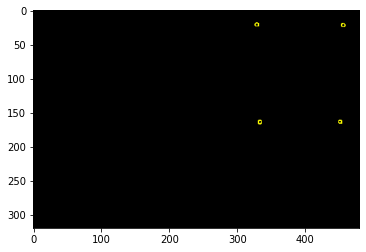

In [2]:
### 차영상
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지 불러오기
img1 = cv2.imread('./picture/robot_arm1.jpg')
img2 = cv2.imread('./picture/robot_arm2.jpg')
print(img1.shape, img2.shape)

# 이미지 gray로 변환
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 두 이미지 사이의 차 구하기
diff = cv2.absdiff(img1_gray, img2_gray)
print(diff.shape)
plt.imshow(diff)

# 두 이미지 사이의 차이가 1 이상인 곳을 binary화 하기 → 1만큼이라도 차이가 있는 곳은 255(흰색) 처리 된다!
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)
# 흑백 이미지를 3차원화해준다.
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
# 3차원 이미지 중 R을 0으로 바꾼다 → 파랑 +  녹색으로 노랑이 된다
diff_red[:, :, 2] = 0
plt.imshow(diff_red)

# 기존 이미지와 diff_red를 연산하여 둘 중 차이가 없는 부분은 그대로, 차이가 있는 부분은 노랑의 반대값인 red로 반환한다
spot = cv2.bitwise_xor(img2, diff_red)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey(0)
cv2.destroyAllWindows()

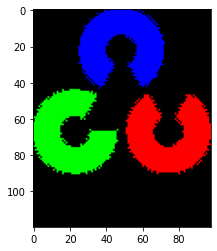

In [21]:
### 이미지 합성과 마스킹
import cv2
import numpy as np

# 이미지 불러오기
img_fg = cv2.imread('./picture/opencv_logo2.png', cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('./picture/girl.jpg')

# 알파 체널에서 투명하지 않은 부분을 하얀색으로, 그 외는 검정으로 하는 mask 만들기 → 로고 흰색, 배경 검정
_, mask = cv2.threshold(img_fg[:, :, 3], 1, 255, cv2.THRESH_BINARY)
# 마스크 역 처리 → 로고 검정, 배경 흰색
mask_inv = cv2.bitwise_not(mask)

# 로고 이미지를 BGR로 바꾸기 → 3차원으로 변경, 이때 아래의 글자는 사라지는게 아니라 같은 배경색에 묻힌것!
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
plt.imshow(img_fg)
# 로고 이미지의 h, w 가져오기
h, w = img_fg.shape[:2]
# bg 이미지에서 관심 영역 설정하기 → gril 이미지의 왼쪽 상단부분
roi = img_bg[10:10+h, 10:10+w]

# 로고 이미지는 검정 배경에 색상 로고 이미지 + mask는 하얀글자에 검정 배경 → 로고 이미지 중에서 글자 부분이 드러남
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask)
# girl 이미지의 관심영역, mask는 검정 글자에 하얀 배경 → 이미지 배경에 검은 로고 올라감
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

# 검은 배경에 로고 + 이미지 배경에 검은 로고 → 이미지 배경 + 로고
added = masked_fg + masked_bg

# 이렇게 만들어진 added 조각을 girl 이미지에 올리기
img_bg[10:10+h, 10:10+w] = added

cv2.imshow('mask', mask)
cv2.imshow('mask', mask)

cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('masked_fg', masked_fg)
cv2.imshow('masked_bg', masked_bg)
cv2.imshow('added', added)
cv2.imshow('result', img_bg)
cv2.waitKey(0)
cv2.destroyAllWindows()



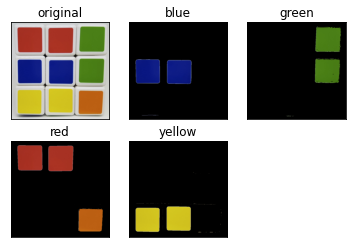

In [15]:
### HSV 색상으로 마스킹
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./picture/cube.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 색상별 영역 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255, 255])
green1 = np.array([45, 50, 50])
green2 = np.array([75, 255, 255])
red1 = np.array([0, 50, 50])
red2 = np.array([15, 255, 255])
red3 = np.array([165, 50, 50])
red4 = np.array([180, 255, 255])
yellow1 = np.array([20, 50, 50])
yellow2 = np.array([35, 255, 255])

# 색상에 따른 마스크 생성 :inRange(이미지, 시작, 끝) → 해당 색상 범위를 제외하고 나머지를 0인 마스크를 만들어준다.
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

# 원본 이미지 연산에서 mask되지 않은 각 색상 영역만 보여준다.
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

imgs = {'original':img, 'blue':res_blue, 'green':res_green, 'red':res_red, 'yellow':res_yellow}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 3, i+1)
    plt.title(k)
    plt.imshow(v[:, :, ::-1])
    plt.xticks([]); plt.yticks([])
plt.show()

In [17]:
### 크로마키 마스킹과 합성
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지 불러오기
img1 = cv2.imread('./picture/man_chromakey.jpg')
img2 = cv2.imread('./picture/street.jpg')

# 두 이미지의 가로 세로 구하기
height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]

# x = 두 이미지 가로 길이 차이의 절반
x = (width2 - width1) // 2
# y = 두 이미지  세로 길이 차이
y = height2 - height1
# w = man의 가로 길이 + 아까 구한 x → img2의 가운데 위치
w = x + width1
# y = man의 세로 길이 + 두 이미지 세로 길이 차이 y → img2의 세로 길이
h = y + height1

# 배경 크로마티 색상 구하기
chromakey = img1[:10, :10, :]
# 크로마티 색상과 비슷한 영역 범위 설정
offset = 20

# 크로마키 범위의 hsv 색상 구하기
hsv_chroma = cv2.cvtColor(chromakey, cv2.COLOR_BGR2HSV)
# man 이미지도 hsv 색상으로 변환
hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

# 크로마키의 색상 범위만 구하기
chroma_h = hsv_chroma[:, :, 0]
# 크로마키 색상 - offset, 100, 100
lower = np.array([chroma_h.min()-offset, 100, 100])
# 크로마키 색상 + offset, 255, 255
upper = np.array([chroma_h.max()+offset, 255, 255])

# 위에서 구한 색상들만 보여주는 mask 만들기
mask = cv2.inRange(hsv_img, lower, upper)
# 위에서 결정한 색상범위만 지워주는 mask_inv 생성
mask_inv = cv2.bitwise_not(mask)
# 배경에서 man 이미지를 담을 관심영역 지정 = 세로는 가장 아래 끝에서 시작, 가로는 정 중앙 위치
roi = img2[y:h, x:w]
# man이미지, 녹색 범위만 지우는 mask_inv
fg = cv2.bitwise_and(img1, img1, mask=mask_inv)
# 배경 이미지에서  녹색범위만 보여주는 mask
bg = cv2.bitwise_and(roi, roi, mask=mask)
# 배경이미지 + man이미지 한 것을 원래의  배경 이미지의 원하는 위치에 넣
img2[y:h, x:w] = fg + bg

cv2.imshow('chromakey', img1)
cv2.imshow('added', img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [19]:
### seamlessClone을 이용한 이미지 합성
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지 불러오기
img1 = cv2.imread('./picture/drawing.jpg')
img2 = cv2.imread('./picture/my_hand.jpg')

# img1과 똑같은 크기의 흰 mask 생성
mask = np.full_like(img1, 255)

# 이미지의 h, w 구하기
height, width = img2.shape[:2]
# h, w를 반으로 나눠서 적당한 좌표 구하기
center = (width//2, height // 2)

# seamlessClone을 이용하여 두 이미지를 자연스럽게 합성
normal = cv2.seamlessClone(img1, img2, mask, center, cv2.NORMAL_CLONE) # 입력 원본 유
mixed = cv2.seamlessClone(img1, img2, mask, center, cv2.MIXED_CLONE) # 입력과 대상을 혼합

cv2.imshow('normal', normal)
cv2.imshow('mixed', mixed)
cv2.waitKey()
cv2.destroyAllWindows()

### 5. 히스토그램

(256, 1)
270000.0 (450, 600)


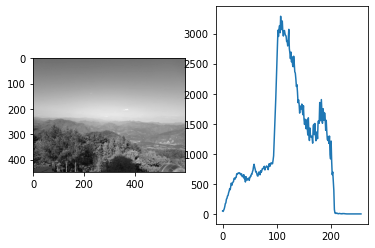

In [9]:
# 1체널 이미지의 히스토그램
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 그레이스케일로 읽기
img = cv2.imread('./picture/mountain.jpg', cv2.IMREAD_GRAYSCALE)
plt.subplot(121)
plt.imshow(img, 'gray')

# 이미지의 히스토그램 그리기
# calcHist(img, channel, mask, bins, range)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.subplot(122)
plt.plot(hist)

print(hist.shape)
print(hist.sum(), img.shape)
plt.show()

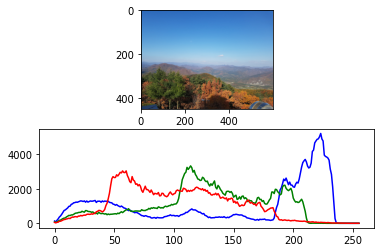

In [20]:
### 컬러 히스토그램
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./picture/mountain.jpg')
img_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(211)
plt.imshow(img_plt)

channels =  cv2.split(img)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.subplot(212)
    plt.plot(hist, color = color)
plt.show()

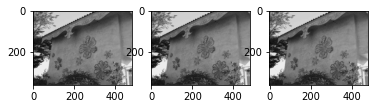

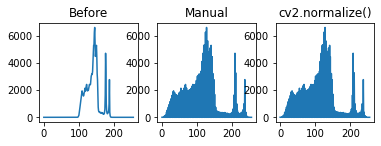

In [13]:
### 히스토그램 정규화
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지 불러오기
img = cv2.imread('./picture/abnormal.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지 정규화 연산하기
img_f = img.astype(np.float32)
img_norm =  ((img_f - img_f.min()) * (255) / (img_f.max() - img_f.min()))
img_norm = img_norm.astype(np.uint8)

# openCV API를 이용한 정규화
img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

# 히스토그램 계산
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0, 255])
hist_norm2 = cv2.calcHist([img_norm2], [0], None, [256], [0, 256])

cv2.imshow('Basic', img)
cv2.imshow('Manual', img_norm)
cv2.imshow('cv2.normalize()', img_norm2)
cv2.waitKey(0)
cv2.destroyAllWindows()


plt.subplot(231)
plt.imshow(img, 'gray')
plt.subplot(232)
plt.imshow(img_norm, 'gray')
plt.subplot(233)
plt.imshow(img_norm2, 'gray')
plt.show()


hists = {'Before':hist, 'Manual':hist_norm, 'cv2.normalize()':hist_norm2}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(2, 3, i+4)
    plt.title(k)
    plt.plot(v)
plt.show()

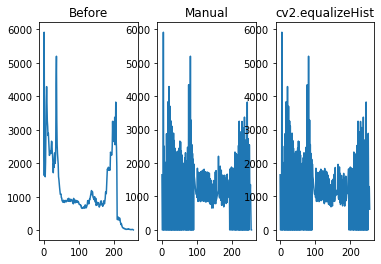

In [25]:
### 이퀄라이즈
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지 불러오기
img = cv2.imread('./picture/yate.jpg', cv2.IMREAD_GRAYSCALE)
# 이미지 가로, 세로 지정
rows, cols = img.shape[:2]

# 이미지 히스토그램 계산
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
# 이미지의 누적 히스토그램
cdf = hist.cumsum()
# 0 → Nan
cdf_m = np.ma.masked_equal(cdf, 0)
# 히스토그램 평준화 계산
cdf_m = (cdf_m - cdf_m.min()) / (rows * cols) *  255
# Nan → 0으로
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
# 새로 구해진 평균화 값을 기존의  이미지에 매핑
img2 = cdf[img]

# openCV API로 이퀄라이즈 히스토그램 적용
img3 = cv2.equalizeHist(img)

# 이퀄라이즈 결과를 히스토그램으로 계산하기
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

cv2.imshow('Before', img)
cv2.imshow('Manual', img2)
cv2.imshow('cv2.equalizeHist()', img3)

hists = {'Before':hist, 'Manual':hist2, 'cv2.equalizeHist':hist3}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1, 3, i+1)
    plt.title(k)
    plt.plot(v)
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
### 컬러 이미지에 대한 이퀄라이즈 적용하기
import numpy as np
import cv2

# 이미지 불러오기
img = cv2.imread('./picture/yate.jpg')

# 이미지 YUV로 변환하기
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# YUV의 첫번째 체널(밝기)에 대해 이퀄라이즈 적용
img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])

# 컬러 스케일 변환 : YUV → BGR
img2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2.imshow('Before', img)
cv2.imshow('After', img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [31]:
### CLAHE
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지 불러오기 
img = cv2.imread('./picture/bright.jpg')
# 이미지 변환하기 : BGR  → YUV
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

### 이퀄라이즈 히스토그램
# 원본 카피하기
img_eq = img_yuv.copy()
# 원본의 색상 밝기 체널을 이퀄라이즈하기
img_eq[:, :, 0] = cv2.equalizeHist(img_eq[:, :, 0])
# 이퀄라이즈 된 이미지를 다시 변환하기 : YUV → BGR
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

# CLAHE 이용
# 원본 카피
img_clahe = img_yuv.copy()
# clahe 설정하기 : clipLimit은 대조값 제한, tileGridSize는 영역크기 설정
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
# 만든 clahe를 명암 채널에 적용하기
img_clahe[:, :, 0] = clahe.apply(img_clahe[:,:,0])
# clahe 적용된 이미지를 다시 변환하기 : YUV → BGR
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

cv2.imshow('Before', img)
cv2.imshow('CLAHE', img_clahe)
cv2.imshow('equalizeHist', img_eq)
cv2.waitKey()
cv2.destroyAllWindows()

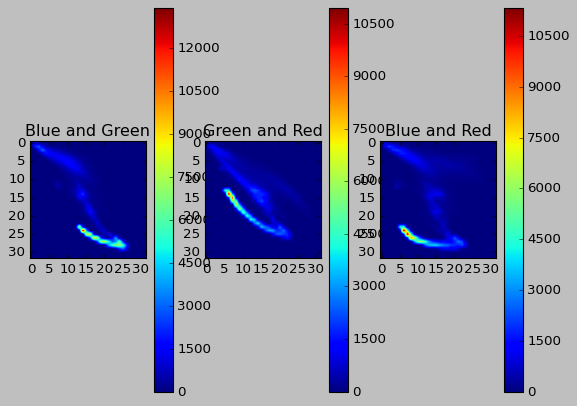

In [34]:
### 2D 히스토그램
import cv2
import matplotlib.pylab as plt

# plt의 색상 스타일 classic
plt.style.use('classic')
img = cv2.imread('./picture/mountain.jpg')

plt.subplot(131)
hist = cv2.calcHist([img], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = plt.imshow(hist)
plt.title('Blue and Green')
plt.colorbar(p)

plt.subplot(132)
hist = cv2.calcHist([img], [1, 2], None, [32, 32], [0, 256, 0, 256])
p = plt.imshow(hist)
plt.title('Green and Red')
plt.colorbar(p)

plt.subplot(133)
hist = cv2.calcHist([img], [0, 2], None, [32, 32], [0, 256, 0, 256])
p = plt.imshow(hist)
plt.title('Blue and Red')
plt.colorbar(p)

In [41]:
### 역투영 : 색상으로 특정 물체나 사물의 일부를 배경에서 분리 가능
import numpy as np
import matplotlib.pylab as plt

# 창 이름 미리 정하기
win_name = 'back_projection'
# 이미지 불러오기
img = cv2.imread('./picture/pump_horse.jpg')
# 이미지 hsv로 변환하기
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# 원본 = img, 카피 = draw
draw = img.copy()

# 만들어진 이미지를 masking 한 뒤 계산해주는 함수
def masking(bp, win_name):
    # 타원 disc 만들기
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    # 만들어진 필터를 앞에서 받은  bp
    cv2.filter2D(bp, -1, disc, bp)
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow(win_name, result)

# 역투영함수의 구현
def backProject_manual(hist_roi):
    # 전체 이미지의 historam 계산하기
    hist_img = cv2.calcHist([hsv_img], [0, 1], None, [180, 256], [0, 180, 0, 256])
    # 전체 이미지의 히스토그램 / 선택한 이미지의 히스토그램 + 1
    hist_rate = hist_roi / (hist_img + 1)
    # 선택된 영역의 채널을 h, s, v로 나눠주기
    h, s, v = cv2.split(hsv_img)
    # 이렇게 구한 h와 s를 평평하게 펴서 만든 픽셀 값을 매핑에 사용
    bp = hist_rate[h.ravel(), s.ravel()]
    # bp에서 minimum으로 1보다 큰 값을 1로 바꿔주기 → 비율이라서 1을 넘으면 안되기 때문!!
    bp = np.minimum(bp, 1)
    # bp를 원래의 차원과 똑같이 만들어준다.
    bp = bp.reshape(hsv_img.shape[:2])
    # 이런 bp들을 정규화해준다.
    cv2.normalize(bp, bp, 0, 255, cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    # 정규화 결과를 이미지로 보여주기
    masking(bp, 'result_manula')

# openCV에 있는 역투영함수 사용하기
def backProject_cv(hist_roi):
    bp = cv2.calcBackProject([hsv_img], [0, 1], hist_roi, [0, 180, 0, 256], 1)
    masking(bp, 'result_cv')

# ROI 지정 → 길이 반환
(x, y, w, h) = cv2.selectROI(win_name, img, False)

# 만약 영역지정을 올바르게 한 경우
if w > 0 and h > 0:
    # roi의 영역을 draw 이미지에서 슬라이싱으로 지정
    roi = draw[y:y+h, x:x+w]
    # 슬라이싱한 영역과 같은 위치에 사각형 그리기
    cv2.rectangle(draw, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # 선택된 영역을 hsv 색상으로 변환
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    # 선택된 영역의 histogram 계산하기
    hist_roi = cv2.calcHist([hsv_roi], [0, 1], None, [180, 256], [0, 180, 0, 256])
    # manual로 짠 결과 보기
    backProject_manual(hist_roi)
    # cv의 API로 짠 결과 보기
    backProject_cv(hist_roi)

cv2.imshow(win_name, draw)
cv2.waitKey()
cv2.destroyAllWindows()

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


CORREL    	img1:   1.00	img2:   0.70	img3:   0.56	img4:   0.23	
CHISQR    	img1:   0.00	img2:  67.33	img3:  35.71	img4:1129.49	
INTERSECT 	img1:   1.00	img2:   0.54	img3:   0.40	img4:   0.18	
BHATTACHARYYA	img1:   0.00	img2:   0.48	img3:   0.47	img4:   0.79	


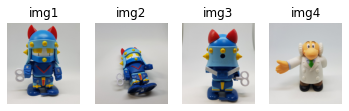

In [2]:
### 히스토그램 비교
import numpy as np
import matplotlib.pylab as plt
import cv2

# 이미지 불러오기
img1 = cv2.imread('./picture/taekwonv1.jpg')
img2 = cv2.imread('./picture/taekwonv2.jpg')
img3 = cv2.imread('./picture/taekwonv3.jpg')
img4 = cv2.imread('./picture/dr_ochanomizu.jpg')

# 시작 이미지 보여주기
cv2.imshow('query', img1)
# 이미지 목록 만들기
imgs = [img1, img2, img3, img4]
# 빈 목록 만들기
hists = []
# imgs 안의 img 하나하나 불러오기
for i, img in enumerate(imgs):
    plt.subplot(1, len(imgs), i+1)
    plt.title('img%d' %(i+1))
    plt.axis('off')
    plt.imshow(img[:, :, ::-1])
    # 이때 이미지들 각각을 hsv로 변환하기
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # hsv 이미지로 히스토그램 계산하기
    hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
    # 히스토그램 결과값 0에서 1 사이의 값으로 표준화하기
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    # 계산되서 나온 값 hists에 붙이기
    hists.append(hist)

# hists의 첫번째 이미지를 기준으로 계산하기
query = hists[0]
# 사용할 메소드들을 딕셔너리화 하기
methods = {'CORREL':cv2.HISTCMP_CORREL, # 상관관계 계산 (일치하면1, 최대불일치 -1, 무관계 0)
           'CHISQR':cv2.HISTCMP_CHISQR, # 카이제곱 (일치하면 0, 아니면 최대불일치값 미정)
           'INTERSECT':cv2.HISTCMP_INTERSECT, # 교차분석 (일치하면 1, 아니면 0)
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA} # 바타차야 (완전일치 0, 최대불일치 1)

# methods 딕셔너리 안의 flag 하나하나 불러와서 사용하기
for j, (name, flag) in enumerate(methods.items()):
    # 이름 출력할때 칸 맞춰주기
    print('%-10s'%name, end='\t')
    # 각 hists 결과값과 img를 함께 하나씩 사용하기
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        # 영상이 얼마나 비슷한지 비교해보기
        ret = cv2.compareHist(query, hist, flag)
        # 만약 교차분석인 경우
        if flag == cv2.HISTCMP_INTERSECT:
            # 계산 값을 비교대상으로 나눠서 1로 정규화하기
            ret = ret/np.sum(query)
        # 이미지 이름과 계산값 예쁘게 출력되게 하기
        print('img%d:%7.2f'%(i+1, ret), end='\t')
    # 방법 하나당 한줄씩 띄어쓰기
    print()
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()